In [49]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Read in data files
uber_raw_apr14_df = pd.read_csv('Data/uber-raw-data-apr14.csv')
uber_raw_may14_df = pd.read_csv('Data/uber-raw-data-may14.csv')
uber_raw_jun14_df = pd.read_csv('Data/uber-raw-data-jun14.csv')
uber_raw_jul14_df = pd.read_csv('Data/uber-raw-data-jul14.csv')
uber_raw_aug14_df = pd.read_csv('Data/uber-raw-data-aug14.csv')
uber_raw_sep14_df = pd.read_csv('Data/uber-raw-data-sep14.csv')

uber_raw_jan15_1_df = pd.read_csv('Data/uber-raw-data-jan15-1.csv')
uber_raw_jan15_2_df = pd.read_csv('Data/uber-raw-data-jan15-2.csv')
uber_raw_feb15_1_df = pd.read_csv('Data/uber-raw-data-feb15-1.csv')
uber_raw_feb15_2_df = pd.read_csv('Data/uber-raw-data-feb15-2.csv')
uber_raw_mar15_1_df = pd.read_csv('Data/uber-raw-data-mar15-1.csv')
uber_raw_mar15_2_df = pd.read_csv('Data/uber-raw-data-mar15-2.csv')
uber_raw_apr15_1_df = pd.read_csv('Data/uber-raw-data-apr15-1.csv')
uber_raw_apr15_2_df = pd.read_csv('Data/uber-raw-data-apr15-2.csv')
uber_raw_may15_1_df = pd.read_csv('Data/uber-raw-data-may15-1.csv')
uber_raw_may15_2_df = pd.read_csv('Data/uber-raw-data-may15-2.csv')
uber_raw_jun15_1_df = pd.read_csv('Data/uber-raw-data-jun15-1.csv')
uber_raw_jun15_2_df = pd.read_csv('Data/uber-raw-data-jun15-2.csv')


weather_raw_df = pd.read_csv('Data/NewYorkWeatherData_2014_2015.csv')

In [30]:
month_list = [
    uber_raw_apr14_df,
    uber_raw_may14_df,
    uber_raw_jun14_df,
    uber_raw_jul14_df,
    uber_raw_aug14_df,
    uber_raw_sep14_df,
    uber_raw_jan15_1_df,
    uber_raw_jan15_2_df,
    uber_raw_feb15_1_df,
    uber_raw_feb15_2_df,
    uber_raw_mar15_1_df,
    uber_raw_mar15_2_df,
    uber_raw_apr15_1_df,
    uber_raw_apr15_2_df,
    uber_raw_may15_1_df,
    uber_raw_may15_2_df,
    uber_raw_jun15_1_df,
    uber_raw_jun15_2_df
]

uber_raw_df  = pd.concat(month_list, join ='outer')

uber_raw_df.head()

,Date/Time,Lat,Lon,Base,Unnamed: 0,Dispatching_base_num,Affiliated_base_num,locationID,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,NaN
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,NaN
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,NaN
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,NaN
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,NaN


In [31]:
# Convert Date/Time column to datetime object for conversion later
uber_raw_df['Date/Time'] = pd.to_datetime(uber_raw_df['Date/Time'])

# create new 'Time' column converting the original datetime object into just time in the format 00:00:00
uber_raw_df['Time'] = uber_raw_df['Date/Time'].apply(lambda x: x.time().strftime("%H:%M:%S"))

# create new 'Date' column converting the original datetime object into just date in the format YYYY-MM-DD
uber_raw_df['Date'] = uber_raw_df['Date/Time'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

# Display head
uber_raw_df.head()

,Date/Time,Lat,Lon,Base,Unnamed: 0,Dispatching_base_num,Affiliated_base_num,locationID,Month,Time,Date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,NaN,00:11:00,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,NaN,00:17:00,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,NaN,00:21:00,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,NaN,00:28:00,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,NaN,00:33:00,2014-04-01


In [32]:
uber_raw_df=uber_raw_df[['Date/Time', 'Time', 'Date', 'Lat']]

uber_raw_df[['Lat']] = uber_raw_df[['Lat']].fillna(value = 0)

uber_raw_df


,Date/Time,Time,Date,Lat
0,2014-04-01 00:11:00,00:11:00,2014-04-01,40.7690
1,2014-04-01 00:17:00,00:17:00,2014-04-01,40.7267
2,2014-04-01 00:21:00,00:21:00,2014-04-01,40.7316
3,2014-04-01 00:28:00,00:28:00,2014-04-01,40.7588
4,2014-04-01 00:33:00,00:33:00,2014-04-01,40.7594
...,...,...,...,...
1408443,2015-06-30 22:51:00,22:51:00,2015-06-30,0.0000
1408444,2015-06-30 22:52:00,22:52:00,2015-06-30,0.0000
1408445,2015-06-30 23:06:00,23:06:00,2015-06-30,0.0000
1408446,2015-06-30 23:20:00,23:20:00,2015-06-30,0.0000


In [47]:
# filter raw data into just Time, Date, and Latitude (for counting)
uber_clean_df = uber_raw_df[['Lat', 'Time', 'Date']]

# split time column into hours, minutes, and seconds, then take just the hours in the Time column
uber_clean_df['Time'] = uber_clean_df['Time'].apply(lambda x: x.split(':')[0])

# count all latitudes (ride counts), grouped by Date then time
ride_count_df = uber_clean_df.groupby(['Date','Time'], as_index=True).agg(Ride_count = ('Lat', 'count'))


ride_count_df

/Users/jaketrevithick/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Ride_count
Date       Time            
2014-04-01 00           138
           01            66
           02            53
           03            93
           04           166
...                     ...
2015-06-30 19          5807
           20          5392
           21          5955
           22          5749
           23          4731

[8725 rows x 1 columns]

In [50]:
# Formating the Weather raw data

# split weather dt_iso and cut off the '0000 UTC'. 
# Rejoin the 'Date' and 'Time' field to it can be converted into datetime object
weather_raw_df['dt_iso'] = pd.to_datetime(weather_raw_df['dt_iso'].apply(lambda x: ' '.join(x.split(' ')[:2])))

# create new 'Time' column converting the original datetime object into just time in the format 00:00:00
weather_raw_df['Time'] = weather_raw_df['dt_iso'].apply(lambda x: x.time().strftime("%H:%M:%S"))

# create new 'Date' column converting the original datetime object into just date in the format YYYY-MM-DD
weather_raw_df['Date'] = weather_raw_df['dt_iso'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

#  keep only hours from the time column
weather_raw_df['Time'] = weather_raw_df['Time'].apply(lambda x: x.split(':')[0])

# filter weather dataframe to only relevant data.
# NOTE: Further filter this dataframe in analysis for cleaner implementation.
weather_clean_df = weather_raw_df[['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_main', 'weather_description', 'Time', 'Date']]

weather_clean_df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,Time,Date
0,31.95,22.98,29.95,33.75,1022,47,11.41,NaN,NaN,NaN,NaN,1,Clear,sky is clear,00,2014-01-01
1,30.63,21.88,29.95,31.26,1023,48,10.29,NaN,NaN,NaN,NaN,1,Clear,sky is clear,01,2014-01-01
2,30.06,22.44,28.36,30.94,1024,47,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,02,2014-01-01
3,28.51,20.55,26.56,29.95,1025,44,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,03,2014-01-01
4,27.57,20.21,26.02,28.94,1025,42,6.93,NaN,NaN,NaN,NaN,1,Clear,sky is clear,04,2014-01-01


In [70]:
# merge the two dataframes into a combined dataframe.
combined_data_df = pd.merge(weather_clean_df, ride_count_df, how ='inner', on = ['Date', 'Time'])

combined_data_df['Day_of_week'] = pd.to_datetime(combined_data_df['Date'])
combined_data_df['Month'] = pd.to_datetime(combined_data_df['Date'])
combined_data_df['Year'] = pd.to_datetime(combined_data_df['Date'])

combined_data_df['Day_of_week'] = combined_data_df['Day_of_week'].apply(lambda x: x.weekday())
combined_data_df['Month'] = combined_data_df['Month'].apply(lambda x: x.month)
combined_data_df['Year'] = combined_data_df['Year'].apply(lambda x: x.year)

# fill Nans with zeros
combined_data_df[['rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']] = combined_data_df[['rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']].fillna(value=0)

combined_data_df.head()


,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,Time,Date,Ride_count,Day_of_week,Month,Year
0,51.75,48.78,49.95,53.56,1016,46,4.70,NaN,NaN,NaN,NaN,1,Clear,sky is clear,00,2014-04-01,138,1,4,2014
1,49.32,45.91,48.00,51.76,1016,51,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,01,2014-04-01,66,1,4,2014
2,45.21,41.45,42.75,46.94,1017,54,6.93,NaN,NaN,NaN,NaN,1,Clear,sky is clear,02,2014-04-01,53,1,4,2014
3,41.61,35.10,40.26,43.95,1019,58,11.41,NaN,NaN,NaN,NaN,1,Clear,sky is clear,03,2014-04-01,93,1,4,2014
4,41.13,37.22,39.88,42.06,1019,54,5.82,NaN,NaN,NaN,NaN,1,Clear,sky is clear,04,2014-04-01,166,1,4,2014


In [71]:
year_2014_df = combined_data_df[combined_data_df['Year']==2014]
year_2015_df = combined_data_df[combined_data_df['Year']==2015]

Monday_df = combined_data_df[combined_data_df['Day_of_week'] == 0]
Saturday_df = combined_data_df[combined_data_df['Day_of_week'] == 5]

Saturday_2015_df = combined_data_df[(combined_data_df['Day_of_week'] == 5) & (combined_data_df['Year'] == 2015)]
# Add any filtered dataframes you'd like to explore

array([2014])

In [37]:
# function to easily plot scatter plots with linear regression. 

def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title}")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    plt.show()

The r-value is: -0.20721899661980903


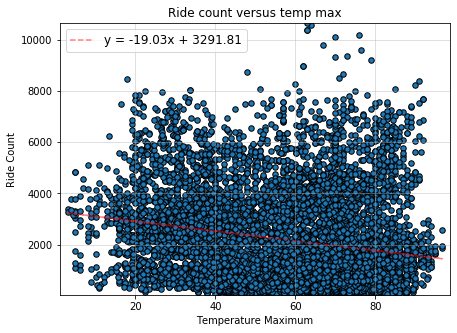

In [38]:
plt_scat(combined_data_df['temp_max'], combined_data_df['Ride_count'], "Temperature Maximum", "Ride Count", "Ride count versus temp max")

The r-value is: 0.4299568087118522


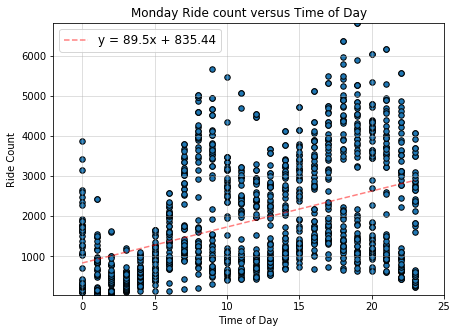

In [40]:
plt_scat((Monday_df['Time']).astype(int), Monday_df['Ride_count'], "Time of Day", "Ride Count", "Monday Ride count versus Time of Day")

The r-value is: 0.46408710182257396


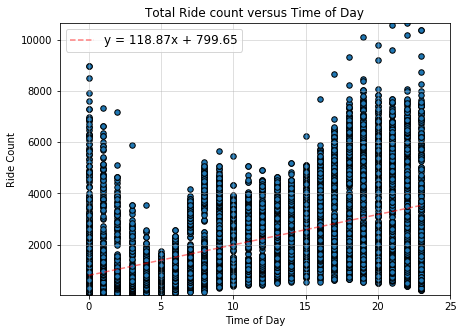

In [41]:
plt_scat((combined_data_df['Time']).astype(int), combined_data_df['Ride_count'], "Time of Day", "Ride Count", "Total Ride count versus Time of Day")

The r-value is: 0.4632207868657899


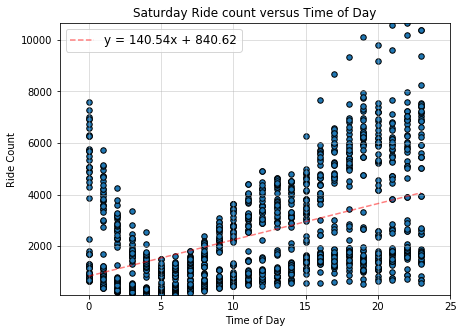

In [42]:
plt_scat((Saturday_df['Time']).astype(int), Saturday_df['Ride_count'], "Time of Day", "Ride Count", "Saturday Ride count versus Time of Day")

The r-value is: -0.42211592944577064


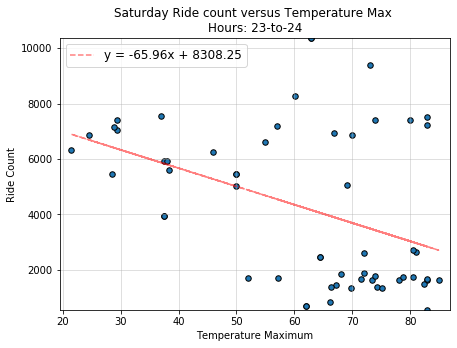

In [43]:
sat_night_df  = Saturday_df[(Saturday_df['Time']).astype(int)>=23]

plt_scat(sat_night_df['temp_max'], sat_night_df['Ride_count'], "Temperature Maximum", "Ride Count", "Saturday Ride count versus Temperature Max \nHours: 23-to-24")

The r-value is: -0.045005052442032165


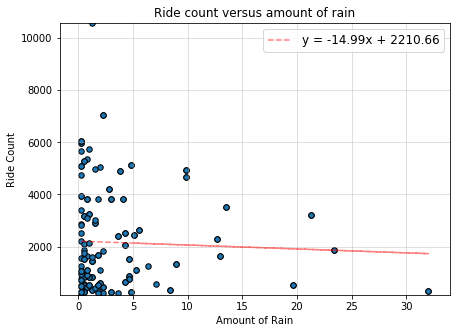

In [65]:
rain_df = combined_data_df[combined_data_df['rain_3h'] >0]

plt_scat(rain_df['rain_3h'], rain_df['Ride_count'], "Amount of Rain", "Ride Count", "Ride count versus amount of rain")

In [58]:
sun_df = combined_data_df[combined_data_df['rain_1h'] == 0]

sun_df.describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,Ride_count,Day_of_week
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.0,587.000000,587.0,587.0,587.000000,587.000000,587.000000
mean,52.376371,49.828620,49.865894,54.839319,1018.323680,49.434412,5.486048,0.0,0.001022,0.0,0.0,18.325383,742.257240,2.957411
std,8.683813,9.348633,8.371415,9.634619,8.774819,17.082026,3.598722,0.0,0.017496,0.0,0.0,32.295057,486.121318,2.038007
min,32.310000,26.350000,30.380000,34.180000,996.000000,14.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,45.000000,0.000000
25%,45.920000,43.700000,43.325000,47.660000,1013.000000,37.000000,3.360000,0.0,0.000000,0.0,0.0,1.000000,349.000000,1.000000
50%,51.660000,49.170000,49.950000,53.940000,1018.000000,49.000000,4.700000,0.0,0.000000,0.0,0.0,1.000000,659.000000,3.000000
75%,58.050000,55.410000,55.350000,61.180000,1023.000000,62.000000,8.050000,0.0,0.000000,0.0,0.0,20.000000,1019.000000,5.000000
max,75.850000,74.880000,71.550000,82.900000,1041.000000,92.000000,17.220000,0.0,0.300000,0.0,0.0,90.000000,2270.000000,6.000000


In [57]:
rain_df.describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,Ride_count,Day_of_week
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0,204.0,204.000000,204.000000,204.000000
mean,47.720980,44.455049,45.714412,50.059412,1013.740196,81.980392,7.041275,1.177941,0.456373,0.0,0.0,83.813725,988.676471,2.568627
std,7.093601,9.085906,6.416835,8.107283,9.909251,12.805849,3.787175,1.498438,2.466027,0.0,0.0,21.144695,736.945248,1.646072
min,32.360000,26.310000,30.160000,33.940000,997.000000,30.000000,0.000000,0.130000,0.000000,0.0,0.0,1.000000,63.000000,0.000000
25%,43.147500,38.187500,42.047500,44.580000,1007.000000,76.750000,4.700000,0.280000,0.000000,0.0,0.0,90.000000,393.750000,1.000000
50%,46.630000,42.945000,44.940000,48.710000,1012.000000,86.000000,6.930000,0.660000,0.000000,0.0,0.0,90.000000,798.000000,2.000000
75%,50.410000,49.070000,48.160000,51.960000,1022.000000,90.000000,10.290000,1.270000,0.000000,0.0,0.0,90.000000,1490.000000,4.000000
max,69.080000,67.710000,64.020000,75.940000,1038.000000,95.000000,16.110000,8.900000,19.600000,0.0,0.0,90.000000,3038.000000,6.000000


The r-value is: 0.27531821223631225


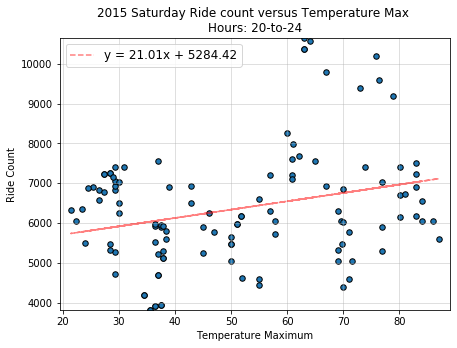

In [66]:
sat_night_2015_df  = Saturday_2015_df[(Saturday_2015_df['Time']).astype(int)>=20]

plt_scat(sat_night_2015_df['temp_max'], sat_night_2015_df['Ride_count'], "Temperature Maximum", "Ride Count", "2015 Saturday Ride count versus Temperature Max \nHours: 20-to-24")